# Clustering using TF-IDF

In [37]:
! pip install yellowbrick -q


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\sadak\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [38]:
# import necessary libraries

import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# Read dataset

english_dishes = pd.read_csv('english_dishes.csv')

In [40]:
english_dishes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230710 entries, 0 to 230709
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   name                       230710 non-null  object 
 1   count                      230710 non-null  int64  
 2   language                   230710 non-null  object 
 3   language_code              230710 non-null  object 
 4   language_confidence_score  230710 non-null  float64
 5   no special characters      230601 non-null  object 
 6   stemmed text               230710 non-null  object 
 7   stop word removed text     230710 non-null  object 
 8   corpus                     230540 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 15.8+ MB


In [41]:
english_dishes.fillna('',inplace=True)

In [42]:

# Define a function to calculate the frequency of words in the corpus
def calculate_word_frequency(corpus):
    # Initialize an empty Counter object to store word frequencies
    word_freq = Counter()
    # Iterate over each document in the corpus
    for document in corpus:
        try:
            # Split the document into words and update the Counter object
            word_freq.update(document.lower().split())
        except Exception as e:
            print(f"Error processing document: {document}")
            print(e)
        
    # Convert the Counter object to a dictionary
    word_freq_dict = dict(word_freq)
    
    return word_freq_dict

# Calculate the word frequency using the 'text' column of the DataFrame
word_frequency = calculate_word_frequency(english_dishes['corpus'])

# Print the word frequency dictionary
print("Word Frequency Dictionary:")
print(word_frequency)


Word Frequency Dictionary:
{'hash': 1715, 'cream': 14414, 'newburg': 485, 'poach': 1872, 'cocott': 128, 'mushroom': 5885, 'truffl': 559, 'chees': 7102, 'tomato': 8301, 'fri': 13983, 'shir': 502, 'celestin': 127, 'extra': 2774, 'sauc': 16801, 'meat': 2799, 'ball': 465, 'chicken': 14497, 'mush': 161, 'room': 97, 'bambooshoot': 4, 'waterchest': 1, 'bread': 5399, 'scrambl': 1535, 'spanish': 811, 'style': 3245, 'la': 5073, 'meyerb': 41, 'clam': 3288, 'jelli': 3347, 'sandwich': 4152, 'slice': 4704, 'turkey': 2790, 'home': 1128, 'made': 1420, 'european': 27, 'type': 81, 'dark': 339, 'lettuc': 3259, 'organ': 47, 'grown': 44, 'trapp': 18, 'garden': 567, 'serv': 5656, 'open': 287, 'tavel': 39, 'rose': 438, 'chateau': 685, 'aqueria': 4, 'brilliant': 11, 'color': 56, 'clean': 21, 'crisp': 966, 'franc': 188, 'beef': 10859, 'taco': 135, 'bean': 3549, 'rice': 4936, 'b': 575, 'enchilada': 121, 'f': 217, 'chili': 382, 'relleno': 45, 'g': 811, 'burrito': 62, 'leg': 1595, 'lamb': 5695, 'caper': 395, 'egg

In [43]:
word_freq = pd.DataFrame(list(word_frequency.items()), columns=['Word', 'Frequency'])

In [44]:
word_freq.sort_values(by='Frequency', ascending=False).cumsum()

,Word,Frequency
85,potato,16986
13,potatosauc,33787
16,potatosaucchicken,48284
1,potatosaucchickencream,62698
9,potatosaucchickencreamfri,76681
...,...,...
16272,potatosaucchickencreamfrisaladbeefbroileggfres...,1049520
16273,potatosaucchickencreamfrisaladbeefbroileggfres...,1049521
16274,potatosaucchickencreamfrisaladbeefbroileggfres...,1049522
16275,potatosaucchickencreamfrisaladbeefbroileggfres...,1049523


In [45]:
word_freq.sort_values(by='Frequency', ascending=False)[28973:]

,Word,Frequency
28973,pple,1


In [46]:
def calculate_percentile(row, cumsum_series):
    return (cumsum_series <= row['cumsum']).mean()


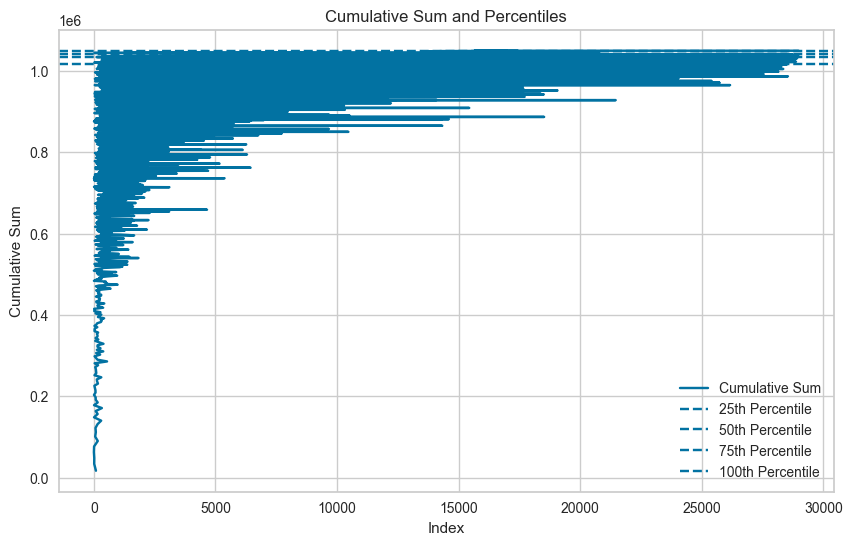

In [47]:

df = word_freq.sort_values(by='Frequency', ascending=False)

# Calculate the cumulative sum of the 'values' column
df['cumsum'] = df['Frequency'].cumsum()
# Calculate the percentile values

df['percentile'] = df.apply(lambda row: calculate_percentile(row, df['cumsum']), axis=1)
percentiles = [0.25, 0.5, 0.75, 1.0]  # 25th, 50th, 75th, and 100th percentiles
percentile_values = np.percentile(df['cumsum'], [p*100 for p in percentiles])

# Plot the cumulative sum
plt.figure(figsize=(10, 6))
plt.plot(df['cumsum'], label='Cumulative Sum')

# Plot the percentile values
for p, value in zip(percentiles, percentile_values):
    plt.axhline(y=value, linestyle='--', label=f'{int(p*100)}th Percentile')

plt.title('Cumulative Sum and Percentiles')
plt.xlabel('Index')
plt.ylabel('Cumulative Sum')
plt.legend()
plt.show()


In [48]:
df[df['Frequency']>50].tail(25)

,Word,Frequency,cumsum,percentile
1038,lion,52,932684,0.057396
4019,armagnac,52,932736,0.057431
2809,ayala,52,932788,0.057465
2838,berg,52,932840,0.057500
4840,portug,52,932892,0.057534
5978,etuve,51,932943,0.057569
1559,capri,51,932994,0.057603
785,substitut,51,933045,0.057638
2806,pauillac,51,933096,0.057672
2397,coca,51,933147,0.057707


## TF-IDF Vectorization

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

In [50]:
vectorizer = TfidfVectorizer(min_df=30)
model = vectorizer.fit(english_dishes['corpus'])
X = model.transform(english_dishes['corpus'])


## Dimensionality reduction using PCA

In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [52]:
tfidf_X = X.toarray()

In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(tfidf_X)


In [54]:
pca = PCA(n_components=None)  # n_components=None keeps all components
X_pca = pca.fit_transform(X_scaled)


In [55]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[1.25094435e-03 1.07894917e-03 1.05221668e-03 ... 3.29296962e-05
 2.56428056e-05 1.94600254e-05]


In [56]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
optimal_dimensions = np.argmax(cumulative_variance_ratio >= 0.90) + 1  # 90% variance explained


In [57]:
print(f"Optimal number of dimensions: {optimal_dimensions}")
print(f"Explained variance ratio per component: {explained_variance_ratio}")
print(f"Cumulative explained variance ratio: {cumulative_variance_ratio}")


Optimal number of dimensions: 1961
Explained variance ratio per component: [1.25094435e-03 1.07894917e-03 1.05221668e-03 ... 3.29296962e-05
 2.56428056e-05 1.94600254e-05]
Cumulative explained variance ratio: [0.00125094 0.00232989 0.00338211 ... 0.9999549  0.99998054 1.        ]


In [58]:
pca = PCA(n_components=1961)  # n_components=1961 which covers 90% data
X_pca = pca.fit_transform(X_scaled)

## Train Test split

In [59]:
# # train test split
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# random_seed = 6
# x_train, x_test = train_test_split(X_pca, test_size=0.2, random_state=random_seed)

## K-Mean Clustering

C:\Users\sadak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sadak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sadak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

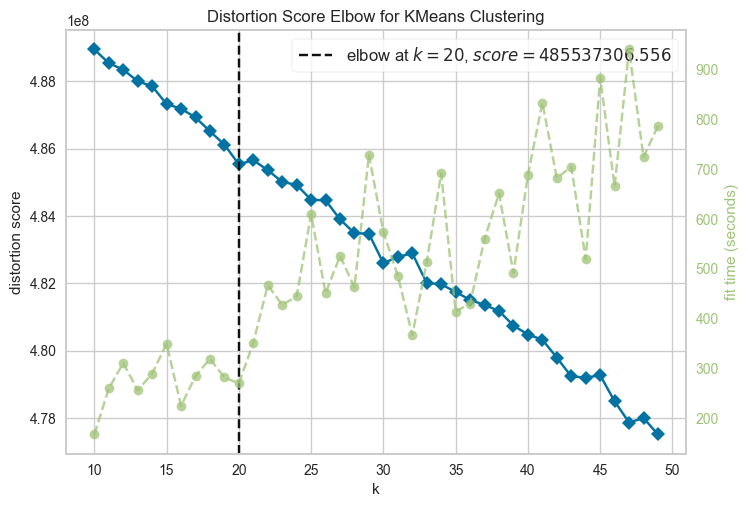

C:\Users\sadak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [60]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KMeans model
kmeans = KMeans(random_state=42)

# Initialize the KElbowVisualizer with the KMeans model
# The metric 'distortion' computes the sum of squared distances from each point to its assigned center
elbow_visualizer = KElbowVisualizer(kmeans, k=(10, 50), metric='distortion')

# Fit the visualizer to the data
elbow_visualizer.fit(X_pca)

# Show the elbow plot to find the optimal number of clusters
elbow_visualizer.show()

# Retrieve the optimal number of clusters from the elbow visualizer
optimal_clusters = elbow_visualizer.elbow_value_

# Re-run KMeans with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_pca)

# Assign the cluster labels to each point in the data
labels = kmeans_optimal.labels_


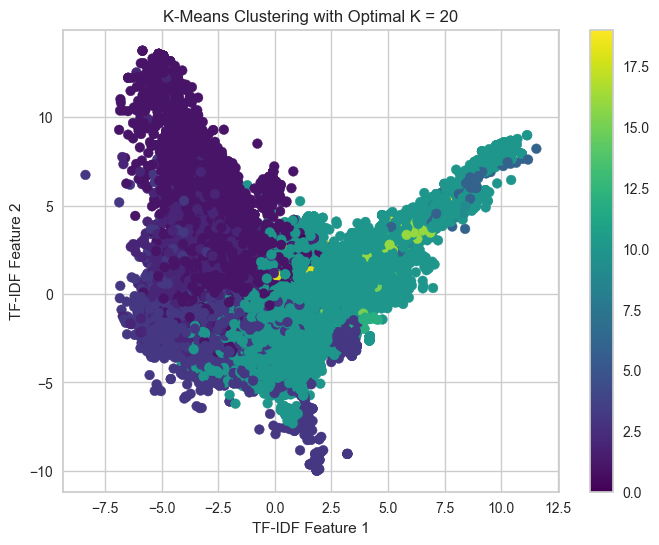

In [61]:

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.title(f'K-Means Clustering with Optimal K = {optimal_clusters}')
plt.xlabel('TF-IDF Feature 1')
plt.ylabel('TF-IDF Feature 2')
plt.colorbar()
plt.show()


In [62]:
x_cluster = kmeans_optimal.predict(X_pca)
print(x_cluster)

[ 1 10 10 ... 10 10  3]


In [63]:
# Assigning clusters to the menu for visualization.
english_dishes['cluster'] = x_cluster

In [64]:
english_dishes.head()

,name,count,language,language_code,language_confidence_score,no special characters,stemmed text,stop word removed text,corpus,cluster
0,""" hashed in cream",1,English,en,-21.231043,hashed in cream,"['hash', 'in', 'cream']","['hash', 'cream']",hash cream,1
1,""" Newburg",1,English,en,9.061840,Newburg,['newburg'],['newburg'],newburg,10
2,""" poached",1,English,en,9.061840,poached,['poach'],['poach'],poach,10
3,""" cocotte",1,English,en,9.061840,cocotte,['cocott'],['cocott'],cocott,1
4,""" "" mushrooms",1,English,en,9.061840,mushrooms,['mushroom'],['mushroom'],mushroom,1


In [65]:
english_dishes.to_csv('TF-IDF_clusters.csv', index=False)

## Word Cloud of cluster 1

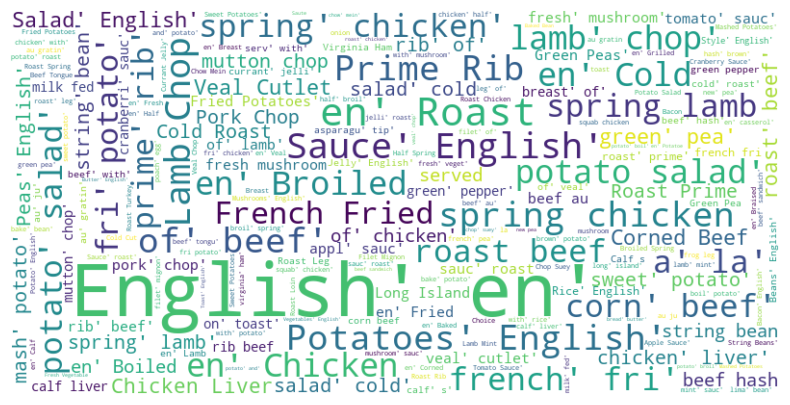

In [66]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ' '.join(map(str, english_dishes[english_dishes['cluster']==1].values))

#'text_data' contains your text data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Word Cloud of cluster 2

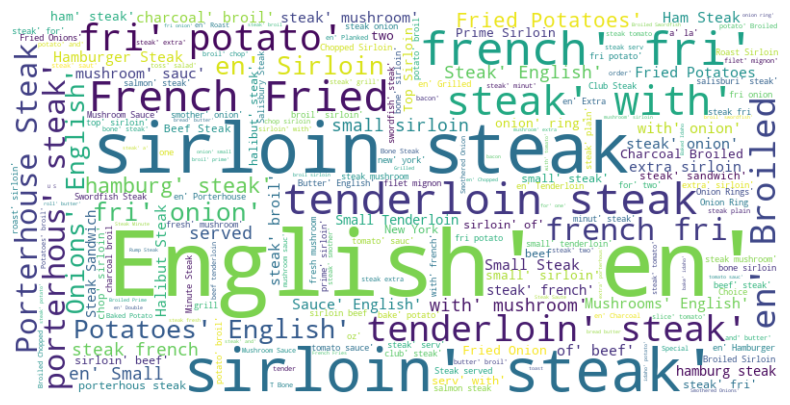

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ' '.join(map(str, english_dishes[english_dishes['cluster']==2].values))

#'text_data' contains your text data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Word Cloud of cluster 3

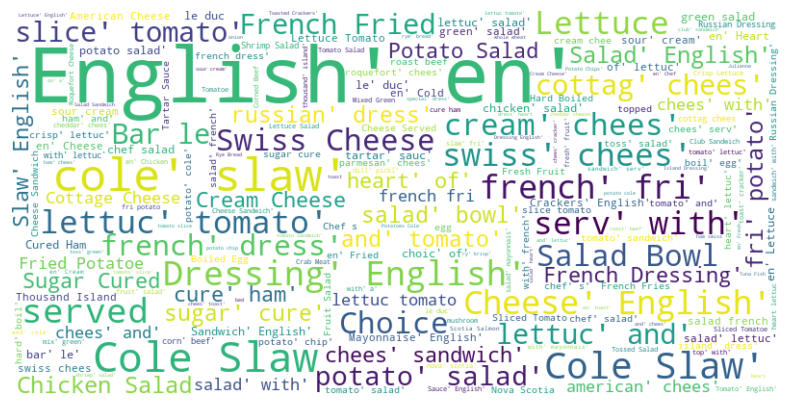

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ' '.join(map(str, english_dishes[english_dishes['cluster']==3].values))

#'text_data' contains your text data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Conclusion

20 distinct clusters were formed using this clusters we can distinguish salads and streaks. It's better to try with advance embedding models to form clusters.